# 1 Data preparation

In [340]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from math import radians, sin, cos, sqrt, atan2
from geopy.distance import great_circle
from sklearn.model_selection import train_test_split

In [341]:
df=pd.read_csv('amended data.csv')

In [342]:
median=df['price'].median()
print(df['price'].median())

64000.0


In [343]:
df.loc[df['price']>median,'price_class']=1
df.loc[df['price']<=median,'price_class']=0

# 1.1 Create new binary variable - Is it Center?

In [344]:
df['center']=df['district'].apply(lambda x:1 if x in ('centrs','Vecrīga')else 0)

df['center'].unique()

array([1, 0], dtype=int64)

# 1.2 Create a couple of binary variables from the field facilities

In [345]:
value_counts=df['facilities'].value_counts()
print(value_counts)

Parkošanas vieta                              650
Lodžija                                       400
Lodžija, Parkošanas vieta                     370
Balkons                                       290
Balkons, Parkošanas vieta                     232
Terase, Parkošanas vieta                       76
Terase                                         52
Balkons, Lodžija, Parkošanas vieta             38
Balkons, Lodžija, Terase, Parkošanas vieta     21
Balkons, Terase, Parkošanas vieta              21
Balkons, Lodžija                               15
Lodžija, Terase, Parkošanas vieta               6
Pirts, Parkošanas vieta                         5
Lodžija, Terase                                 4
Terase, Pirts                                   3
Balkons, Lodžija, Terase                        1
Name: facilities, dtype: int64


In [346]:
df['facilities']=df['facilities'].fillna('-1')

In [347]:
def Parking(value):
    return 1 if "Parkošanas vieta" in value else 0

df['parking']= df['facilities'].apply(lambda x: Parking(x))

In [348]:
def balcony(value):
    if "Balkons" in value:
        return 1
    elif "Lodžija" in value:
        return 1
    elif "Terase" in value:
        return 1
    else:
        return 0

df['balcony']= df['facilities'].apply(lambda x: balcony(x))

In [349]:
df=df.rename(columns={'len':'lat'})

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3356 non-null   int64  
 1   district             3356 non-null   object 
 2   data_street          3356 non-null   object 
 3   rooms                3356 non-null   int64  
 4   area                 3356 non-null   float64
 5   price                3356 non-null   int64  
 6   cur_floor            3356 non-null   int64  
 7   total_floor          3356 non-null   int64  
 8   lift                 3356 non-null   int64  
 9   seria                3356 non-null   object 
 10  house_type           3356 non-null   object 
 11  facilities           3356 non-null   object 
 12  lat                  3356 non-null   float64
 13  lon                  3356 non-null   float64
 14  price_per_sqm        3356 non-null   float64
 15  floor                3356 non-null   i

# 1.3 Fill in missing coordinates (lat and lon)

In [351]:
Properties_with_missing_coordinates=df[df['lon']==-1]
print(Properties_with_missing_coordinates)

      Unnamed: 0 district              data_street  rooms  area   price  \
485          485     Cits             Lomonosova 2      1  22.0   25000   
1400        1400     Cits              Dīķu iela 2      4  74.0   21850   
1968        1968   Imanta  Anniņmuižas bulvāris 41      2  66.0  132000   

      cur_floor  total_floor  lift    seria  ... house_seria_general  \
485           1            4     0  P. kara  ...  Pre_war_apartments   
1400          3            3     0  Specpr.  ...   Serial_apartments   
1968         23           24     1    Jaun.  ...        New_projects   

     Daugava_bank  floor_total                  street          street_name  \
485             1        1 / 4            Lomonosova 2           Lomonosova   
1400            1        3 / 3             Dīķu iela 2            Dīķu iela   
1968            0      23 / 24  Anniņmuižasbulvāris 41  Anniņmuižasbulvāris   

      street_number price_class  center parking balcony  
485               2         0.0    

In [352]:
row_index=485
new_lat_1=56.938252644826655
new_lon_1=24.156020097221585
df.at[row_index,'lat']= new_lat_1
df.at[row_index,'lon']= new_lon_1

row=df.loc[df['Unnamed: 0']==485][['lat','lon']]
print(row)

           lat       lon
485  56.938253  24.15602


In [353]:
row_index=1400
new_lat_2=56.919847492216206
new_lon_2=24.086959281878208
df.at[row_index,'lat']= new_lat_2
df.at[row_index,'lon']= new_lon_2

row=df.loc[df['Unnamed: 0']==1400][['lat','lon']]
print(row)

            lat        lon
1400  56.919847  24.086959


In [354]:
row_index=1968
new_lat_3=56.95920121755761
new_lon_3=24.01384986838741
df.at[row_index,'lat']= new_lat_3
df.at[row_index,'lon']= new_lon_3

row=df.loc[df['Unnamed: 0']==1986][['lat','lon']]
print(row)

            lat        lon
1986  56.916259  24.093464


In [355]:
df.to_excel('check.xlsx', index=False)

# 1.4 Drop non-numeric variables

In [356]:
df=df.drop(['Unnamed: 0','district', 'street','data_street', 'seria','house_type','facilities','price_per_sqm','house_seria_general','floor_total','street_name','street_number', 'rooms'],axis=1)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          3356 non-null   float64
 1   price         3356 non-null   int64  
 2   cur_floor     3356 non-null   int64  
 3   total_floor   3356 non-null   int64  
 4   lift          3356 non-null   int64  
 5   lat           3356 non-null   float64
 6   lon           3356 non-null   float64
 7   floor         3356 non-null   int64  
 8   Daugava_bank  3356 non-null   int64  
 9   price_class   3356 non-null   float64
 10  center        3356 non-null   int64  
 11  parking       3356 non-null   int64  
 12  balcony       3356 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 341.0 KB


# 2 Decision tree model versions

# 2.1 Test model version 1

# 2.1.2 Split df into training and validation sets

In [358]:
df_train, df_valid=train_test_split(df,test_size=0.25,random_state=11111)

In [359]:
features_train=df_train.drop(['price', 'price_class'], axis=1)
target_train=df_train['price_class']

features_valid=df_valid.drop(['price', 'price_class'], axis=1)
target_valid=df_valid['price_class']

In [360]:
print(features_train.shape)
print(target_train.shape)

(2517, 11)
(2517,)


In [361]:
print(features_valid.shape)
print(target_valid.shape)

(839, 11)
(839,)


# 2.1.3 Get accuracy for model version 1

In [362]:
model = DecisionTreeClassifier(random_state=11111)
 
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

In [363]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(target_valid, predictions) 
accuracy

0.8712753277711561

# 2.2 Test model version 2

# 2.2.1 Calculate new variable - distance from center

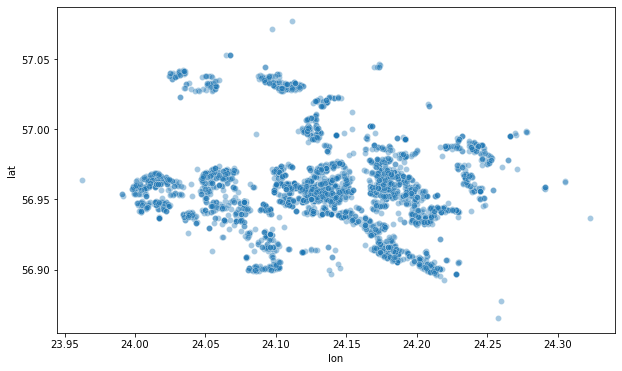

In [364]:
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x = 'lon', y = 'lat', data = df, hue = None, alpha=0.4)
plt.show()

In [365]:
# Define the central point as a tuple of (latitude, longitude)
central_point = (56.951599754910994, 24.113290094982993)  # Note that order is (lat, lon)

# Define a function to calculate the distance
def calculate_distance(row):
   obj_point = (row['lat'], row['lon'])
   return great_circle(central_point, obj_point).km

# Apply the function to create a new column 'distance_to_center_km'
df['distance_to_center_km'] = df.apply(calculate_distance, axis=1)

In [366]:
df['distance_to_center_km'].describe()

count    3356.000000
mean        4.541350
std         2.592722
min         0.164168
25%         2.280484
50%         4.402195
75%         6.133299
max        13.920236
Name: distance_to_center_km, dtype: float64

# 2.2.2  Split df into training and validation sets

In [367]:
df_train, df_valid=train_test_split(df,test_size=0.25,random_state=11111)

features_train=df_train.drop(['price', 'price_class'], axis=1)
target_train=df_train['price_class']

features_valid=df_valid.drop(['price', 'price_class'], axis=1)
target_valid=df_valid['price_class']

# 2.2.3 Get accuracy for model version 2

In [368]:
model = DecisionTreeClassifier(random_state=11111)
 
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

In [369]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(target_valid, predictions) 
accuracy

0.8641239570917759

# 2.3 Test model version 3

# 2.3.1 Add new variable - Distance from airport

In [370]:
# Define the central point as a tuple of (latitude, longitude)
central_point = (56.92200101647137, 23.97974797600975)  # Note that order is (lat, lon)

# Define a function to calculate the distance
def calculate_distance(row):
   obj_point = (row['lat'], row['lon'])
   return great_circle(central_point, obj_point).km

# Apply the function to create a new column 'distance_to_center_km'
df['distance_to_airport_km'] = df.apply(calculate_distance, axis=1)

In [371]:
df['distance_to_airport_km'].describe()

count    3356.000000
mean       10.677960
std         3.568868
min         2.543634
25%         8.188713
50%        10.811472
75%        13.426344
max        20.869786
Name: distance_to_airport_km, dtype: float64

# 2.3.2 Split df into training and validation sets

In [372]:
df_train, df_valid=train_test_split(df,test_size=0.25,random_state=11111)

features_train=df_train.drop(['price', 'price_class'], axis=1)
target_train=df_train['price_class']

features_valid=df_valid.drop(['price', 'price_class'], axis=1)
target_valid=df_valid['price_class']

# 2.3.3 Get accuracy for model version 3

In [373]:
model = DecisionTreeClassifier(random_state=11111)
 
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

In [374]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(target_valid, predictions) 
accuracy

0.866507747318236

# 2.4 Changing hyperparameters

In [375]:
accuracy_array = []
best_model = None
best_result = 0

for depth in range(1, 24):
    model = DecisionTreeClassifier(random_state=11111, max_depth=depth)
    model.fit(features_train, target_train)
    
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)

    if result > best_result:
        best_result = result
        
    print('max_depth =', depth,': ', end='')
    print(result)

    accuracy_array.append([depth, result])
    
df_ac = pd.DataFrame(accuracy_array, columns=['depth', 'accuracy'])
print('')
print('best result :', best_result)

max_depth = 1 : 0.799761620977354
max_depth = 2 : 0.8355184743742551
max_depth = 3 : 0.8426698450536353
max_depth = 4 : 0.8557806912991657
max_depth = 5 : 0.8510131108462455
max_depth = 6 : 0.865315852205006
max_depth = 7 : 0.8641239570917759
max_depth = 8 : 0.8557806912991657
max_depth = 9 : 0.8593563766388558
max_depth = 10 : 0.8593563766388558
max_depth = 11 : 0.865315852205006
max_depth = 12 : 0.8605482717520858
max_depth = 13 : 0.8533969010727056
max_depth = 14 : 0.8545887961859356
max_depth = 15 : 0.8581644815256257
max_depth = 16 : 0.8533969010727056
max_depth = 17 : 0.8641239570917759
max_depth = 18 : 0.8569725864123957
max_depth = 19 : 0.8641239570917759
max_depth = 20 : 0.8605482717520858
max_depth = 21 : 0.866507747318236
max_depth = 22 : 0.866507747318236
max_depth = 23 : 0.866507747318236

best result : 0.866507747318236


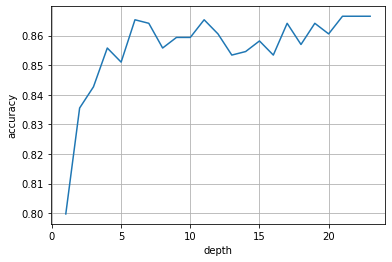

In [376]:
plt = sns.lineplot(data=df_ac, x="depth", y="accuracy")
plt.grid()

# 3 Other model types

# 3.1 Random forest

In [377]:
from sklearn.ensemble import RandomForestClassifier 

In [378]:
model = RandomForestClassifier(random_state=11111, n_estimators=3)

In [379]:
model.fit(features_train, target_train) 

RandomForestClassifier(n_estimators=3, random_state=11111)

In [380]:
result = model.score(features_valid, target_valid) 
print(result)

0.8700834326579261


In [381]:
from tqdm.notebook import tqdm

In [382]:
best_model = None
best_result = 0

for est in tqdm(range(1, 18)):
    for depth in range(1, 18): 
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result:
            best_depth = depth
            best_est = est
            best_model = model
            best_result = result
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

print('')
print('best_depth =', best_depth)
print('best_est =', best_est)

  0%|          | 0/17 [00:00<?, ?it/s]

Accuracy наилучшей модели на валидационной выборке: 0.8915375446960667

best_depth = 14
best_est = 11


# 3.2 Logistic regression

In [383]:
from sklearn.linear_model import LogisticRegression 

In [384]:
#liblinear
#lbfgs
iterat = 1000
model = LogisticRegression(solver='liblinear', max_iter=iterat) 
model.fit(features_train, target_train) 

result = model.score(features_valid, target_valid)
    
print('result :', result)   

result : 0.8581644815256257


# Conclusion: Random forest provides the best accuracy vs Decision tree and Logistic regression

# 3.3 Regression

In [385]:
from sklearn.metrics import mean_squared_error 

In [386]:
df=pd.read_excel('check.xlsx')

In [387]:
# Define the central point as a tuple of (latitude, longitude)
central_point = (56.951599754910994, 24.113290094982993)  # Note that order is (lat, lon)

# Define a function to calculate the distance
def calculate_distance(row):
   obj_point = (row['lat'], row['lon'])
   return great_circle(central_point, obj_point).km

# Apply the function to create a new column 'distance_to_center_km'
df['distance_to_center_km'] = df.apply(calculate_distance, axis=1)

In [388]:
# Define the central point as a tuple of (latitude, longitude)
central_point = (56.92200101647137, 23.97974797600975)  # Note that order is (lat, lon)

# Define a function to calculate the distance
def calculate_distance(row):
   obj_point = (row['lat'], row['lon'])
   return great_circle(central_point, obj_point).km

# Apply the function to create a new column 'distance_to_center_km'
df['distance_to_airport_km'] = df.apply(calculate_distance, axis=1)

In [389]:
df=df.drop(['Unnamed: 0','district', 'street','data_street', 'seria','house_type','facilities','price_per_sqm','house_seria_general','floor_total','street_name','street_number', 'rooms'],axis=1)

In [390]:
df_train, df_valid=train_test_split(df,test_size=0.25,random_state=11111)

features_train=df_train.drop(['price'], axis=1)
target_train=df_train['price']

features_valid=df_valid.drop(['price'], axis=1)
target_valid=df_valid['price']

# 3.4 Decision tree in regression

In [391]:
from sklearn.tree import DecisionTreeRegressor

In [453]:
RMSE_array = []
best_model = None
best_result = 9999999999999999999999

for depth in range(1, 24):
    model = DecisionTreeRegressor(random_state=11111, max_depth=depth)
    model.fit(features_train, target_train)
    
    predictions_valid = model.predict(features_valid)
    result = mean_squared_error(target_valid, predictions_valid)**0.5 
    
    if result < best_result:
        best_result = result
        best_model = model

    print('max_depth =', depth,': ', end='')
    print(result)
    
    RMSE_array.append([depth, result])
        
df_ac = pd.DataFrame(RMSE_array, columns=['depth', 'RMSE'])
print('')
print('best result :', best_result)

print("RMSE best model on the validation set:", best_result)


max_depth = 1 : 80968.1400288584
max_depth = 2 : 70699.79042843093
max_depth = 3 : 91051.97787969367
max_depth = 4 : 89369.78437257242
max_depth = 5 : 87668.5546770125
max_depth = 6 : 86479.17079453247
max_depth = 7 : 87485.85383846906
max_depth = 8 : 88572.61993385835
max_depth = 9 : 89175.539279675
max_depth = 10 : 89077.53638988425
max_depth = 11 : 90661.68463791905
max_depth = 12 : 91495.19793897207
max_depth = 13 : 91135.14099612123
max_depth = 14 : 91106.05802677046
max_depth = 15 : 90683.01699111266
max_depth = 16 : 89947.77197444013
max_depth = 17 : 90747.24862316196
max_depth = 18 : 89638.53828890352
max_depth = 19 : 89941.02058307164
max_depth = 20 : 90760.33218154681
max_depth = 21 : 89613.81755270627
max_depth = 22 : 90468.2413303572
max_depth = 23 : 90422.78216262444

best result : 70699.79042843093
RMSE best model on the validation set: 70699.79042843093


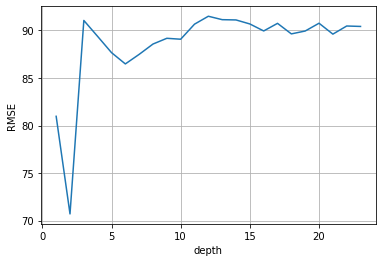

In [454]:
df_ac['RMSE']=df_ac['RMSE']/1000
plt = sns.lineplot(data=df_ac, x="depth", y="RMSE")
plt.grid()

# 3.5 Random forest in regression

In [393]:
from sklearn.ensemble import RandomForestRegressor

In [394]:
best_model = None
best_result = 9999999999999999999999

for est in tqdm(range(10, 51, 10)):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state=11111, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid) 
        result = mean_squared_error(target_valid, predictions_valid)**0.5 
        if result < best_result:
            best_model = model
            best_result = result/1000

print("RMSE best model on the validation set:", best_result)

  0%|          | 0/5 [00:00<?, ?it/s]

RMSE best model on the validation set: 79.48895140530398


# 3.6 Linear regression

In [395]:
from sklearn.linear_model import LinearRegression

In [396]:
model = LinearRegression()
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 

result = mean_squared_error(target_valid, predictions_valid)**0.5 /1000
print("RMSE best model on the validation set:", result)

RMSE best model on the validation set: 66.32449949394402


# Conclusion: Linear regression has the lowest RMSE vs Decision tree in regression and Random forest in regression